In [4]:
# You will need these imports
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Download Chicago Divvy Bike Data from Kaggle
https://www.kaggle.com/michaelshoemaker/divvy-bike-chicago-2018

### 1. Create four DataFrames from the four .csv files

In [6]:

data1 = pd.read_csv(r'C:\Users\khalil\ML Lab 2\Divvy_Trips_2018_Q1.csv')
data2 = pd.read_csv(r'C:\Users\khalil\ML Lab 2\Divvy_Trips_2018_Q2.csv')
data3 = pd.read_csv(r'C:\Users\khalil\ML Lab 2\Divvy_Trips_2018_Q3.csv')
data4 = pd.read_csv(r'C:\Users\khalil\ML Lab 2\Divvy_Trips_2018_Q4.csv')

df1 = pd.DataFrame(data1)  
df2 = pd.DataFrame(data2)  
df3 = pd.DataFrame(data3)  
df4 = pd.DataFrame(data4)  



### 2. Create a single dataframe by combining the four previously created

hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [7]:
#combined_df = df1, df2, df3, df4

combined_df =pd.concat([df1, df2, df3, df4])

### 3. What is the length of the resulting DataFrame ?

In [8]:
len(combined_df)

3603082

### 4. List the datetype of each column
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html


In [9]:
combined_df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

### 5. Turn the two date columns into type pandas.datetime 

In [10]:
combined_df[['start_time','end_time']] = combined_df[['start_time','end_time']].apply(pd.to_datetime)
print(combined_df)

         trip_id          start_time            end_time  bikeid tripduration  \
0       17536702 2018-01-01 00:12:00 2018-01-01 00:17:23    3304        323.0   
1       17536703 2018-01-01 00:41:35 2018-01-01 00:47:52    5367        377.0   
2       17536704 2018-01-01 00:44:46 2018-01-01 01:33:10    4599      2,904.0   
3       17536705 2018-01-01 00:53:10 2018-01-01 01:05:37    2302        747.0   
4       17536706 2018-01-01 00:53:37 2018-01-01 00:56:40    3696        183.0   
...          ...                 ...                 ...     ...          ...   
642681  21742438 2018-12-31 23:45:17 2018-12-31 23:50:05    2931        288.0   
642682  21742439 2018-12-31 23:48:48 2018-12-31 23:57:22    4386        514.0   
642683  21742440 2018-12-31 23:50:09 2018-12-31 23:57:16    4927        427.0   
642684  21742441 2018-12-31 23:55:04 2018-12-31 23:58:24    1350        200.0   
642685  21742442 2018-12-31 23:59:18 2019-01-01 00:20:43    2006      1,285.0   

        from_station_id    

### 6. Now list the dataframe types

In [11]:
combined_df.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

### 7. Create a new column with the month of start_time

In [12]:
combined_df['Month'] = combined_df['start_time'].dt.month 
print(combined_df)

         trip_id          start_time            end_time  bikeid tripduration  \
0       17536702 2018-01-01 00:12:00 2018-01-01 00:17:23    3304        323.0   
1       17536703 2018-01-01 00:41:35 2018-01-01 00:47:52    5367        377.0   
2       17536704 2018-01-01 00:44:46 2018-01-01 01:33:10    4599      2,904.0   
3       17536705 2018-01-01 00:53:10 2018-01-01 01:05:37    2302        747.0   
4       17536706 2018-01-01 00:53:37 2018-01-01 00:56:40    3696        183.0   
...          ...                 ...                 ...     ...          ...   
642681  21742438 2018-12-31 23:45:17 2018-12-31 23:50:05    2931        288.0   
642682  21742439 2018-12-31 23:48:48 2018-12-31 23:57:22    4386        514.0   
642683  21742440 2018-12-31 23:50:09 2018-12-31 23:57:16    4927        427.0   
642684  21742441 2018-12-31 23:55:04 2018-12-31 23:58:24    1350        200.0   
642685  21742442 2018-12-31 23:59:18 2019-01-01 00:20:43    2006      1,285.0   

        from_station_id    

### 8. List the number of rides by month

In [13]:
rides=combined_df['Month'].value_counts()
print(rides)

7     544703
8     530755
6     458419
9     438112
5     401150
10    344940
4     200112
3     174489
11    168774
12    128972
1     109706
2     102950
Name: Month, dtype: int64


In [14]:
rides.sort_index()

1     109706
2     102950
3     174489
4     200112
5     401150
6     458419
7     544703
8     530755
9     438112
10    344940
11    168774
12    128972
Name: Month, dtype: int64

### 9. Chart the number of rides by month

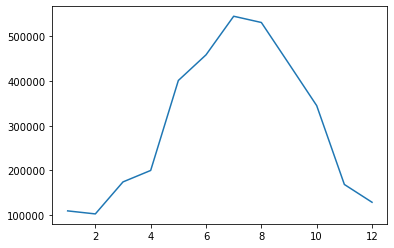

In [15]:
plt.plot(rides.sort_index())

### 10.  It's often useful to think about the data.  Why do you think the number of rides fluctuates by month ?

In [ ]:
Because of WEATHER Conditions (warm, hot, Rainy, Cold, Snow, and Holidays etc).

### 11. Create a function that calculates age.  Use the difference between the current year (can use datetime library for this) and the birthyear column.

hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [33]:
birthdate=combined_df.iloc[:,11]
birthdate

0         1988.0
1         1984.0
2         1989.0
3         1983.0
4         1989.0
           ...  
642681    1983.0
642682    1990.0
642683    1995.0
642684    1999.0
642685    1990.0
Name: birthyear, Length: 3603082, dtype: float64

In [34]:
from datetime import date
 
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [36]:
print(age(date(1988, 1, 1)))

35


### 12. Use the %time magic to rerun your calculation for #11.  How long it takes to run it?

In [42]:
%%time

def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

print(age(date(1988, 1, 1)))

35
Wall time: 999 µs


### 13. What is the maximum age you found in the column you calculated in #11?

In [45]:
birthdate.min()  #THis is the Last value

1895.0

In [46]:
#Now I check MAX AGE
print(age(date(1895, 1, 1)))  

128
